In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

from src import config, datasource
from src import models as notebook_models

sns.set_theme()
%matplotlib inline


In [2]:
settings = config.get_settings()

In [3]:
df_data = datasource.get_data_frame()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     498 non-null    object
 1   filename  498 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [ ]:
train, val, test = datasource.get_train_validate_test(df_data=df_data)

train_loader = datasource.get_data_loader(train)
val_loader = datasource.get_data_loader(val)
test_loader = datasource.get_data_loader(test)


In [ ]:
device = settings.DEVICE
num_classes = 3
model = notebook_models.ResNetVitModel(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
py_model = notebook_models.PyTorchModel(model, criterion, optimizer, scheduler, use_abcd_test=False)


c:\Users\User\Desktop\melanoma-classification-deep-learning\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\Desktop\melanoma-classification-deep-learning\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 / 30  - Loss: 453.5334, Train Acc: 0.7494, Val Acc: 0.5778
Epoch 2 / 30  - Loss: 331.931, Train Acc: 0.6923, Val Acc: 0.5778
Epoch 3 / 30  - Loss: 267.3581, Train Acc: 0.7891, Val Acc: 0.7556
Epoch 4 / 30  - Loss: 223.1019, Train Acc: 0.7916, Val Acc: 0.8667
Epoch 5 / 30  - Loss: 185.8179, Train Acc: 0.8362, Val Acc: 0.8222
Epoch 6 / 30  - Loss: 166.7218, Train Acc: 0.7965, Val Acc: 0.8
Epoch 7 / 30  - Loss: 145.6971, Train Acc: 0.8089, Val Acc: 0.9111
Epoch 8 / 30  - Loss: 130.5845, Train Acc: 0.8089, Val Acc: 0.8667
Epoch 9 / 30  - Loss: 117.2696, Train Acc: 0.8089, Val Acc: 0.8444
Epoch 10 / 30  - Loss: 105.8935, Train Acc: 0.8238, Val Acc: 0.8444
Epoch 11 / 30  - Loss: 96.9722, Train Acc: 0.866, Val Acc: 0.8889
Epoch 12 / 30  - Loss: 94.424, Train Acc: 0.8883, Val Acc: 0.8889
Epoch 13 / 30  - Loss: 93.7732, Train Acc: 0.8908, Val Acc: 0.9111
Epoch 14 / 30  - Loss: 92.2726, Train Acc: 0.9107, Val Acc: 0.8667
Epoch 15 / 30  - Loss: 91.2093, Train Acc: 0.9156, Val Acc: 0.9111


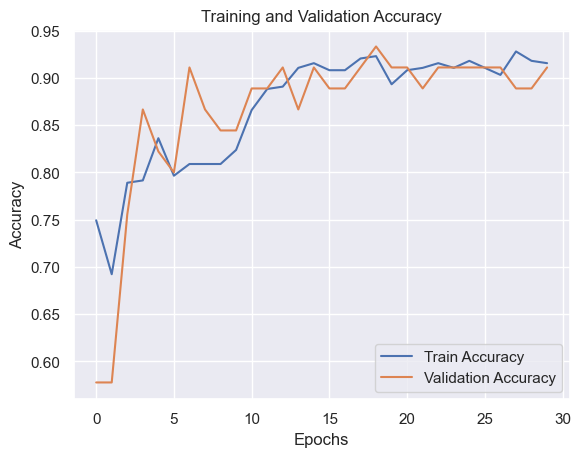

In [ ]:
epochs = 30
py_model.fit(train_loader, val_loader, epochs)
py_model.plot_training_and_validation_accuracy()
plt.show()


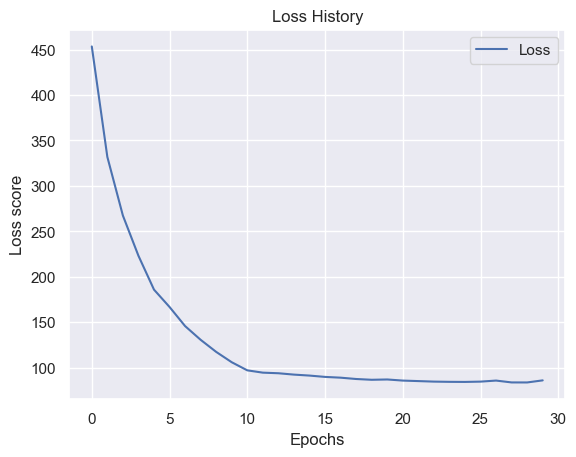

In [ ]:
py_model.plot_loss()
plt.show()


In [ ]:
f1 = py_model.evaluate_on_test_f1(test_loader)
print(f"Test F1 Score: {f1:.4f}")


Test F1 Score: 0.8634


In [ ]:
torch.save(py_model.model.state_dict(), "./experiments/weights/resnet18_melanoma_with_vit.pth")
print("✅ Модель сохранена!")


✅ Модель сохранена!
